<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/understanding_tasks_in_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks in Diffusers

In this notebook we will discuss in detail the following

* Unconditional Image Generation
* Text to Image (Posterboy of Diffusion)
* Image to Image


The next part will focus on:

* Advanced Image to Image Applications
* Image Inpainting
* Depth to Image and Advanced Diffusion Examples

In [ ]:
!pip install -qq diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 13.1 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline
from diffusers import AutoPipelineForText2Image
from diffusers import ControlNetModel
from diffusers.utils import load_image
import torch

# Unconditional Image Generation

Unconditional image generation generates images that look like a random sample from the training data the model was trained on because the denoising process is not guided by any additional context like text or image.

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

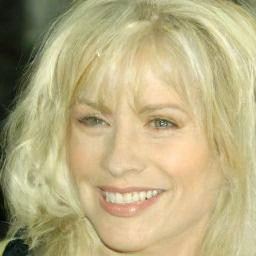

In [ ]:
generator = DiffusionPipeline.from_pretrained("google/ddpm-celebahq-256").to("cuda")
image = generator().images[0]
image

# Text to Image

When you think of diffusion models, text-to-image is usually one of the first things that come to mind. Text-to-image generates an image from a text description

SDXL is a much larger version of the previous Stable Diffusion models, and involves a two-stage model process that adds even more details to an image. It also includes some additional micro-conditionings to generate high-quality images centered subjects. Take a look at the more comprehensive SDXL guide to learn more about how to use it. In general, you can use SDXL like:

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

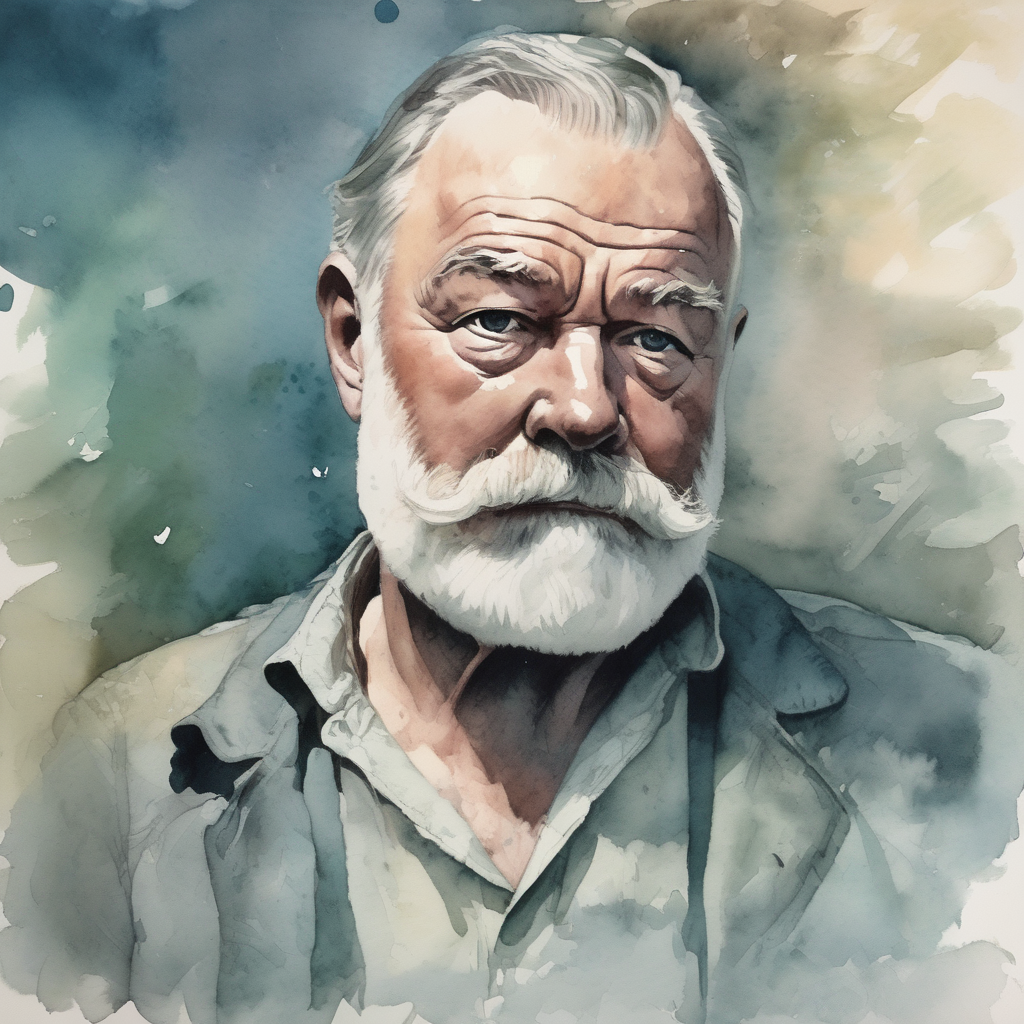

In [ ]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Ernest Hemingway in watercolour, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

# Control Net

ControlNet models are auxiliary models or adapters that are finetuned on top of text-to-image models, such as Stable Diffusion v1.5. Using ControlNet models in combination with text-to-image models offers diverse options for more explicit control over how to generate an image. With ControlNet, you add an additional conditioning input image to the model. For example, if you provide an image of a human pose (usually represented as multiple keypoints that are connected into a skeleton) as a conditioning input, the model generates an image that follows the pose of the image. Check out the more in-depth ControlNet guide to learn more about other conditioning inputs and how to use them.

In this example, let’s condition the ControlNet with a human pose estimation image. Load the ControlNet model pretrained on human pose estimations:

In [ ]:
controlnet = ControlNetModel.from_pretrained(
	"lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
depth_image = load_image("https://i.imgur.com/hB38NsB.png")

config.json:   0%|          | 0.00/945 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

In [ ]:
pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, variant="fp16"
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("A group of travellers in a Paris street, watercolor, warm color palette, detailed, 8k", image=depth_image, generator=generator).images[0]
image

# Specifying Parameters

- height
- width
- guidance scale
- negative prompt
- generator

The guidance_scale parameter affects how much the prompt influences image generation. A lower value gives the model “creativity” to generate images that are more loosely related to the prompt. Higher guidance_scale values push the model to follow the prompt more closely, and if this value is too high, you may observe some artifacts in the generated image.

Just like how a prompt guides generation, a negative prompt steers the model away from things you dont want the model to generate. This is commonly used to improve overall image quality by removing poor or bad image features such as “low resolution” or “bad details”. You can also use a negative prompt to remove or modify the content and style of an image.

A torch.Generator object enables reproducibility in a pipeline by setting a manual seed. You can use a Generator to generate batches of images and iteratively improve on an image generated from a seed as detailed in the Improve image quality with deterministic generation guide.

You can set a seed and Generator as shown below. Creating an image with a Generator should return the same result each time instead of randomly generating a new image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

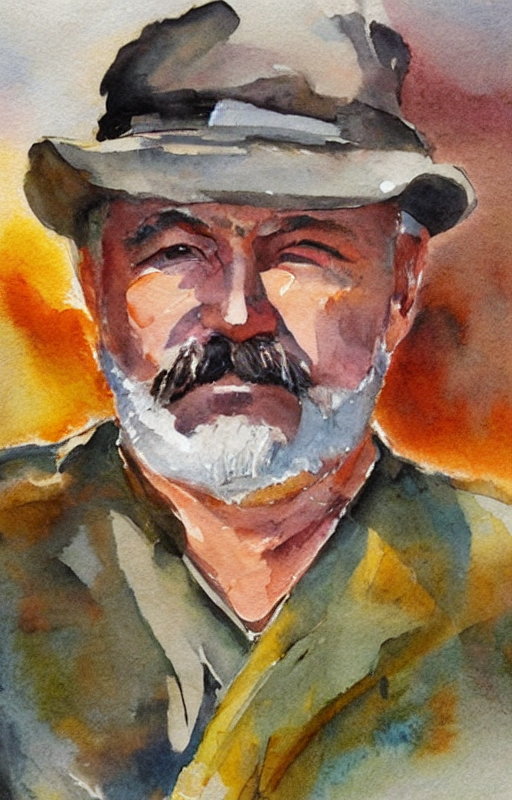

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

generator = torch.Generator(device="cuda").manual_seed(18)

image = pipeline(
	"Ernest Hemingway in watercolor, warm color palette, few colors, detailed, 8k",
            height=800,
            width=512,
            guidance_scale=3.5,
            negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy",
            generator=generator,
).images[0]
image

# Image-to-image

Image-to-image is similar to text-to-image, but in addition to a prompt, you can also pass an initial image as a starting point for the diffusion process. The initial image is encoded to latent space and noise is added to it. Then the latent diffusion model takes a prompt and the noisy latent image, predicts the added noise, and removes the predicted noise from the initial latent image to get the new latent image. Lastly, a decoder decodes the new latent image back into an image.

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

In [ ]:
init_image = load_image("https://i.imgur.com/gq6q4CJ.jpg")

In [ ]:
prompt = "animated Mona Lisa, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

# Stable Diffusion XL (SDXL)



In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

In [ ]:
# prepare image
url = "https://i.imgur.com/gq6q4CJ.jpg"
init_image = load_image(url)

prompt = "animated Mona Lisa, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

In [ ]:
# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, strength=0.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

# Pipeline Parameters

There are several important parameters you can configure in the pipeline that’ll affect the image generation process and image quality. Let’s take a closer look at what these parameters do and how changing them affects the output.

Strength
strength is one of the most important parameters to consider and it’ll have a huge impact on your generated image. It determines how much the generated image resembles the initial image. In other words:

📈 a higher strength value gives the model more “creativity” to generate an image that’s different from the initial image; a strength value of 1.0 means the initial image is more or less ignored
📉 a lower strength value means the generated image is more similar to the initial image
The strength and num_inference_steps parameters are related because strength determines the number of noise steps to add. For example, if the num_inference_steps is 50 and strength is 0.8, then this means adding 40 (50 * 0.8) steps of noise to the initial image and then denoising for 40 steps to get the newly generated image.


The guidance_scale parameter is used to control how closely aligned the generated image and text prompt are. A higher guidance_scale value means your generated image is more aligned with the prompt, while a lower guidance_scale value means your generated image has more space to deviate from the prompt.

You can combine guidance_scale with strength for even more precise control over how expressive the model is. For example, combine a high strength + guidance_scale for maximum creativity or use a combination of low strength and low guidance_scale to generate an image that resembles the initial image but is not as strictly bound to the prompt.

A negative prompt conditions the model to not include things in an image, and it can be used to improve image quality or modify an image. For example, you can improve image quality by including negative prompts like “poor details” or “blurry” to encourage the model to generate a higher quality image. Or you can modify an image by specifying things to exclude from an image.

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()


In [ ]:
# prepare image
url = "https://i.imgur.com/gq6q4CJ.jpg"
init_image = load_image(url)

prompt = "animated Mona Lisa, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy"

In [ ]:
# pass prompts and pipeline parameters
image = pipeline(prompt, negative_prompt=negative_prompt,
                 guidance_scale=8.0,
                 strength=0.8,
                 num_inference_steps=20,
                 image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)